In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import random
from sklearn import linear_model, metrics, model_selection
import sklearn.model_selection as model_selection

tripadvisor_file = "tripadvisor_review.csv"
tripadvisor_data = pd.read_csv(tripadvisor_file)
tripadvisorColumnLst=[
    'User ID',
    'art galleries',
    'dance clubs',
    'juice bars',
    'restaurants',
    'museums',
    'resorts',
    'parks',
    'beaches',
    'theatres',
    'religious institutions',
]
tripadvisor_data.columns = tripadvisorColumnLst
tripadvisor_data.head()

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks,beaches,theatres,religious institutions
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [4]:
tripadvisor_data.describe()

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks,beaches,theatres,religious institutions
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


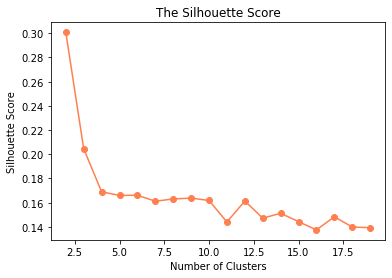

In [5]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
tripadvisor_data1=tripadvisor_data.drop('User ID', axis=1)
s_score = [] # create empty list
for i in range(2, 20): # for each value from 2 to 19:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tripadvisor_data1)
    pred=kmeans.predict(tripadvisor_data1)
    s_score.append(metrics.silhouette_score(tripadvisor_data1, pred))
plt.plot(range(2, 20), s_score, marker='o', c='coral')
plt.title('The Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

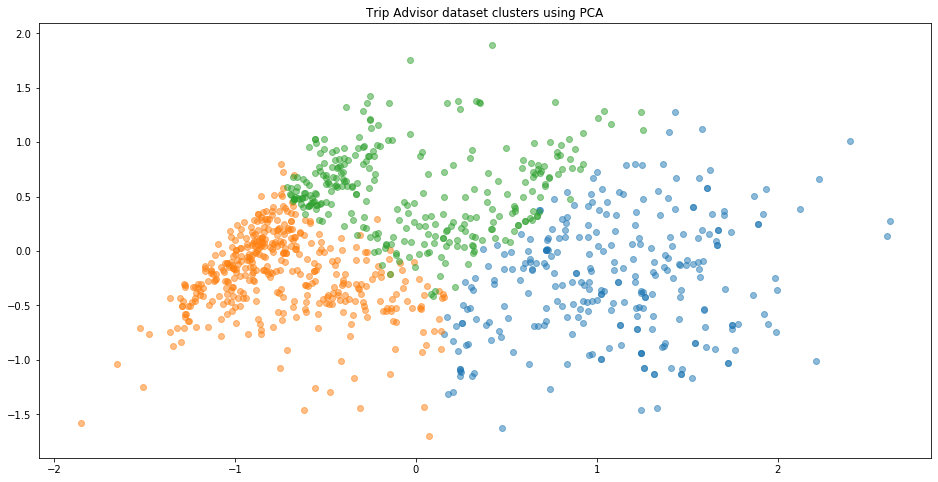

In [28]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(tripadvisor_data1)
prediction = kmeans.predict(tripadvisor_data1)
X = tripadvisor_data1
y = prediction
pca = PCA(n_components=2) # reduce dimesions of the data using PCA and LDA
X_r = pca.fit(X).transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
n_clusters=3
plt.figure(figsize=(16,8))
for  i in range(n_clusters): # plot clusters
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.5)

plt.title('Trip Advisor dataset clusters using PCA')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=42)
model_bl = linear_model.SGDClassifier(loss='log', max_iter=10000,tol=0.21)
model_bl.fit(X_train,y_train)
model_bl.score(X_test,y_test)

0.9717277486910995

In [23]:
clf = linear_model.LogisticRegression(multi_class="auto",solver="lbfgs" ,max_iter=100,penalty='l2')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

/Users/austinf1/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.993193717277487

In [29]:
google_file = "google_review_ratings.csv"
google_data = pd.read_csv(google_file)
google_data=google_data.drop(["Unnamed: 25"],axis=1)
googleColumnLst=[
    'User ID',
    'churches',
    'resorts',
    'beaches',
    'parks',
    'theatres',
    'museums',
    'malls',
    'zoo',
    'restaurants',
    'pubs/bars',
    'local services',
    'burger/pizza shops',
    'hotels/other lodgings',
    'juice bars',
    'art galleries',
    'dance clubs',
    'swimming pools',
    'gyms',
    'bakeries',
    'beauty & spas',
    'cafes',
    'view points',
    'monuments',
    'gardens',
]
google_data.columns = googleColumnLst
google_data.fillna(0,inplace=True)
local_services_mean = google_data['local services'][google_data['local services'] != '2\t2.']
google_data['local services'][google_data['local services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))
google_data['local services'] = google_data['local services'].astype('float64')
pd.set_option('display.max_columns', 30)
google_data.head(20)

<ipython-input-29-47182bbcd066>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_data['local services'][google_data['local services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))


,User ID,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
1,User 2,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
2,User 3,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
3,User 4,0.0,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
4,User 5,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
5,User 6,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
6,User 7,0.0,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,2.64,1.73,1.68,1.69,1.71,1.75,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
7,User 8,0.0,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.64,1.70,1.68,1.69,1.71,1.74,0.60,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0
8,User 9,0.0,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,2.63,1.71,1.67,1.68,1.70,0.75,0.60,0.0,0.0,0.5,0.00,0.0,0.0,0.0,0.0
9,User 10,0.0,5.00,3.64,3.64,5.00,2.92,5.00,2.35,2.32,2.63,1.69,1.67,1.67,1.70,0.74,0.59,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [30]:
google_data.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.550071,2.077958,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.381643,1.249411,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.000000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [31]:
google_data1=google_data.drop('User ID', axis=1)
inertias = []
for i in range(2,20): # run the algo 2-20 to plot inertias 
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) 
    model.fit(google_data1) # run mode for current k
    inertias.append(model.inertia_)
inertias

[183898.16027322088,
 165461.87774919314,
 150891.35400749132,
 141519.10574103874,
 134438.6380107617,
 129232.07272551837,
 124877.22106363937,
 121053.66567508862,
 116756.31751519897,
 113517.85099760263,
 110526.29605257306,
 107999.57415387403,
 105833.88916684753,
 103382.35628708106,
 101836.17944461064,
 99290.73847836335,
 98132.50891451004,
 95840.95806965267]

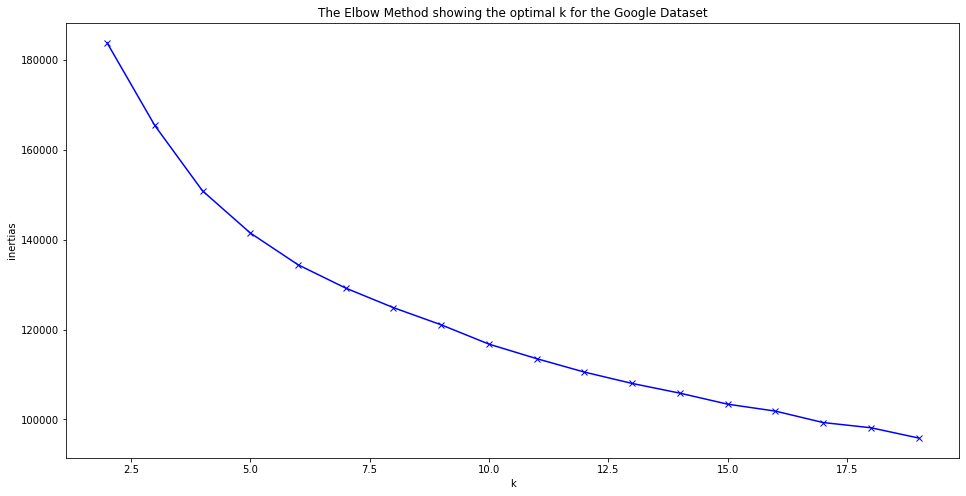

In [32]:
plt.figure(figsize=(16,8))
plt.plot(range(2,20), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertias')
plt.title('The Elbow Method showing the optimal k for the Google Dataset')
plt.show()

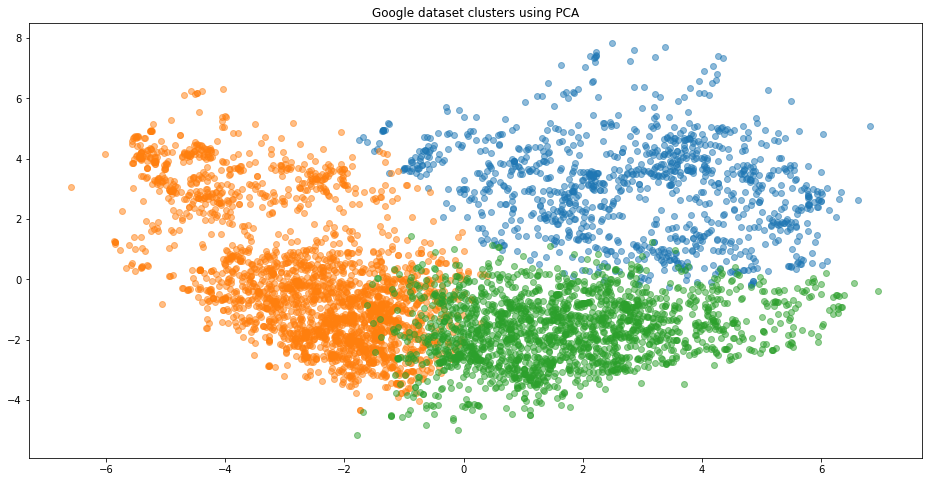

In [33]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42) # set clusters = 3
kmeans.fit(google_data1) # run model
clusterNames = kmeans.labels_
X = google_data1
y = clusterNames
pca = PCA(n_components=2) # reduce dimesions of the data using PCA and LDA
X_r = pca.fit(X).transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
n_clusters=3
plt.figure(figsize=(16,8))
for  i in range(n_clusters): # plot clusters
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.5)

plt.title('Google dataset clusters using PCA')
plt.show()

In [34]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=42)
model_bl = linear_model.SGDClassifier(loss='log', max_iter=10000,tol=0.21)
model_bl.fit(X_train,y_train)
model_bl.score(X_test,y_test)

0.949738219895288

In [35]:
clf = linear_model.LogisticRegression(multi_class="auto",solver="lbfgs" ,max_iter=10000,penalty='l2')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9947643979057592

In [183]:
from sklearn.neighbors import NearestNeighbors
input_data_matrix = google_data[googleColumnLst[1:]].values
knn_model = NearestNeighbors(n_neighbors=3).fit(input_data_matrix)
def compare_dfgoogle(index, ind):        
    zero_cols_in = google_data.loc[index].astype(bool)
    zero_df_in = pd.DataFrame(zero_cols_in[zero_cols_in == True]).reset_index(level = 0)
    in_wo_rating = zero_df_in['index']
    sug_user = google_data.loc[ind]
    zero_cols_sug = sug_user.astype(bool)
    zero_df_sug = pd.DataFrame(zero_cols_sug[zero_cols_sug == True]).reset_index(level = 0)
    sug_wo_rating = zero_df_sug['index']
    sugg_list = list(set(sug_wo_rating) - set(in_wo_rating))
    return sugg_list
def recommend_knngoogle(index):
    distances, indices = knn_model.kneighbors(google_data[googleColumnLst[1:]].iloc[index, :].values.reshape(1,-1), n_neighbors = 10)
    distances = np.sort(distances)
    for i in range(0,len(indices[0])):
        ind = np.where(distances.flatten() == distances[0][i])[0][0]
        sug_list = compare_dfgoogle(index, indices[0][i]) 
        if len(sug_list) > 0:
            break
    return sug_list
print(recommend_knngoogle(16))

['swimming pools']


In [184]:
print(recommend_knngoogle(10))

['bakeries', 'swimming pools']
